In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
os.chdir(r'C:\Users\pradeepC\Desktop\achievment\1 CODING PRACT\DATA SCIENCE\01 MY PRACTISE\09  Clustering\01 clustering')
data=pd.read_csv('customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [56]:
X=data.iloc[:,[3,4]].values

In [59]:
#X

WITHOUT SKLEARN

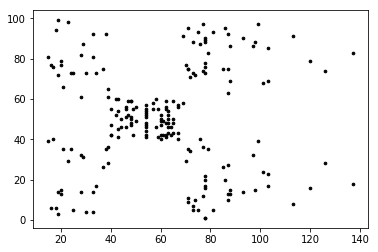

In [60]:
# plottig the values
v1 = data['Annual Income (k$)'].values
v2 = data['Spending Score (1-100)'].values
X = np.array(list(zip(v1, v2))) #X is my data set in array
plt.scatter(v1, v2, c='black', s=7)

In [58]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
  
# Scaled feature 
x_after_min_max_scaler = min_max_scaler.fit_transform(X) 
  
#print ("\nAfter min max Scaling : \n", x_after_min_max_scaler) 
  

C:\Users\pradeepC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# USING ELBOW METHOD TO FIND BEST K VALUE

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss=[]

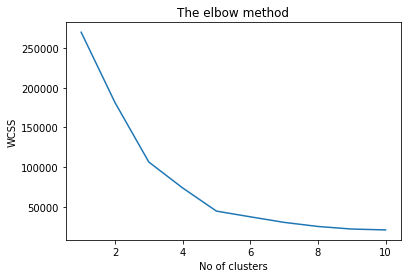

In [8]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()



The Elbow method is a very popular technique and the idea is to run k-means clustering
for a range of clusters k(let's say from 1 to 10) and for each value, 
we are calculating the sum of squared distances from each point to its assigned center(distortions) called WCSS.
 [Means How wide is the cluster after calculating the sum of squared distances]
                          
Observe the sudden or abrupt change in elbow curve
                          3 and 5 is the range and we have to look lowest WCSS value
So i will be choosing K=5 

In [9]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
kmeans.fit(X)
y_means=kmeans.fit_predict(X)

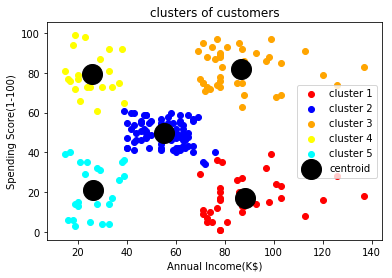

In [10]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],c='red',label='cluster 1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],c='blue',label='cluster 2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],c='orange',label='cluster 3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],c='yellow',label='cluster 4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],c='cyan',label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=400,c='black',label='centroid')
plt.title('clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

# s is related to the pixel

In [14]:
y_means

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [15]:
data['cluster']=y_means
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


ONE HOT ENCODING

In [18]:
Y=pd.get_dummies(data['cluster'])

In [20]:
Y.head()

,0,1,2,3,4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,0,1


In [31]:
data1=pd.concat([data,Y],axis=1)
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,0,1,2,3,4
0,1,Male,19,15,39,4,0,0,0,0,1
1,2,Male,21,15,81,3,0,0,0,1,0
2,3,Female,20,16,6,4,0,0,0,0,1
3,4,Female,23,16,77,3,0,0,0,1,0
4,5,Female,31,17,40,4,0,0,0,0,1


In [32]:
data1.drop(['cluster'],axis=1,inplace=True)

In [33]:
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0,1,2,3,4
0,1,Male,19,15,39,0,0,0,0,1
1,2,Male,21,15,81,0,0,0,1,0
2,3,Female,20,16,6,0,0,0,0,1
3,4,Female,23,16,77,0,0,0,1,0
4,5,Female,31,17,40,0,0,0,0,1


In [53]:
data1.rename(columns={4:'L_income||L_spender',3:'L_income=H_spender',2:'H_income=H_spender',
                    1:'AVG_income=AVG_spender',0:'H_income=L_spender'},inplace=True)

In [55]:
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),H_income=L_spender,AVG_income=AVG_spender,H_income=H_spender,L_income=H_spender,L_income||L_spender
0,1,Male,19,15,39,0,0,0,0,1
1,2,Male,21,15,81,0,0,0,1,0
2,3,Female,20,16,6,0,0,0,0,1
3,4,Female,23,16,77,0,0,0,1,0
4,5,Female,31,17,40,0,0,0,0,1
